# Visualizing data in Python: an overview
Visualization is an important part of every scientist's skill set. The primary goal of scientific visualization is, of course, to make publication figures so beautiful that they cause reviewers to completely overlook all of the warts and blemishes that pervade the rest of the manuscript.

Less cynically, we could say that the goal of visualization is to facilitate better understanding of one's data. The adage that a picture is worth a thousand words has some truth to it. A good visualization can enlighten readers, suggest novel hypotheses, identify problems with the data or one's mental model of the data, and generally make it easier to understand what's going on in the system under investigation.

The Python programming language features a wide array of packages for data visualization. In this notebook, we'll explore some of them. We'll focus exclusively on packages that rely in one way or another on the matplotlib library (though, as I'll note at the end, there are an increasing number of excellent non-matplotlib-based tools). The notebook is intended as an overview rather than a tutorial, so we won't spend very much time on basic plotting; instead, I'll move fairly quickly through the different packages, with most of the emphasis placed on understanding the differences in plotting functionality and interfaces afforded by different Python packages.

## Plotting in matplotlib
The easiest way to get a sense of how plotting works in Python is to dive right in. We'll start out by working with the `matplotlib` package, which, at least for the time being, remains the workhorse plotting package in Python. As we'll see later, many other Python plotting tools are built on top of matplotlib, so even in cases where you're not *explicitly* interacting with your plots through matplotlib, there's a good chance you're doing so implicitly.

Although matplotlib contains a large number of modules, in most cases, users end up working primarily through the `pyplot` module, which provides a high-level interface to a large variety of plotting tools in matplotlib. We can import pyplot just like any other Python model (i.e., with `import`). By convention, it's abbreviated to `plt`:

In [1]:
import matplotlib.pyplot as plt

We also probably want to make sure all of the plots we generate are displayed in-line in the notebook--otherwise each matplotlib figure may start popping up in a new OS window.

In [2]:
%matplotlib inline

Out of the box, pyplot provides a high-level interface for a wide range of common plots. By "high-level", I just mean that we can specify an entire plot using a very compact set of instructions--often just a single function call. We'll take a look at how this works in just a moment; but first, we need to generate some data to plot. Without data, visualization is a fairly difficult proposition.

In [3]:
y = [1, 2, 3, 5, 8, 13, 21]

There, that was easy. Our data consists of a single list containing 7 integer values.

Now we can start plotting. Let's start with something very simple. We'll plot our data points as a single line. 

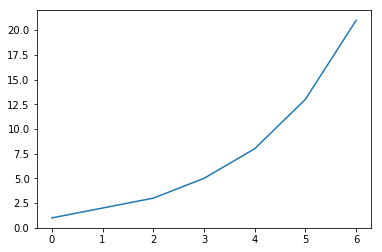

In [4]:
plt.plot(y);

We generated the above plot using just about the simplest code one can imagine: we just called the `plot()` function in matplotlib (technically, in matplotlib's pyplot module, but I'll use the terms interchangeably), and passed it our list of values as the only parameter. We didn't explicitly tell matplotlib *how* to plot the values; we just gave it the list and hoped for the best. As it turns out, if you call `plot()` with a single list of values, matplotlib assumes you want a line plot, and generates a simple plot that connects each consecutive pair of values with a line segment.

Notice that matplotlib interpreted the values we passed in as the y-axis values. If we don't explicitly specify x-axis values, matplotlib assumes that the y-values map serially onto x-values in a one-to-one fashion, such that the first y value corresponds to x=0, the second to x=1, and so on. Of course, often, the data we want to plot isn't sequential like this. What if we had pairs of x-y values? Let's try it out...

In [5]:
x = [1, 6, 3, 9, 4, 16, 2]
# y's copied from above for easier reading
y = [1, 2, 3, 5, 8, 13, 21]

Now we have a fairly random-looking set of 2D points. The first point is at coordinates [1, 1]; the second is at [6, 2]; the third at [3, 3]; and so on. What happens if we pass *both* lists of values to `plot()`?

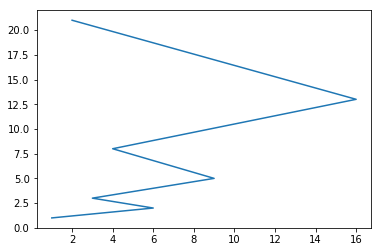

In [6]:
plt.plot(x, y)

When we explicitly pass in two sets of values, matplotlib interprets the first list as the x coordinates and the second as the y coordinates. It still assumes we want a line plot, so it's still connecting each pair of points with a line segment. This may not be exactly what we expect: in most cases where want to plot non-sequential pairs of values, we probably intend to display the values as a scatter plot rather than a line plot. That is, we don't assume that there's any continuity between data points that justifies connecting them with lines.

How do we tell matplotlib to give us a scatter plot rather than a line plot? We have two basic options. First, we could explicitly call pyplot's `scatter()` function:

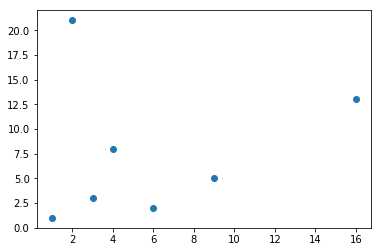

In [7]:
plt.scatter(x, y);

By calling `scatter()` rather than `plot()`, we're explicitly telling matplotlib to display our data points as disconnected points rather than using the default line plot found in `plot()`.

Alternatively, we could have kept using `plot()`, but taken advantage of the many arguments `plot()` supports by explicitly indicating how we want our data points styled:

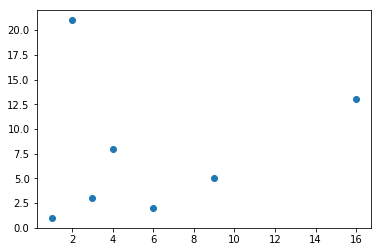

In [8]:
plt.plot(x, y, 'o');

Notice the new positional argument `'o'` we pass to `plot()`. If we consult [the documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) for `plot()`, it turns out that the third optional parameter to `plot()`--named `fmt` (for format)--specifies basic formatting options. `fmt` is actually quite powerful, in that it allows us to control marker and/or line color and style in one shot. For example, let's say we want to show both dashed lines between segments and X's for point markers. And let's say we want to replace the default blue color with red. Here's how we can do that:

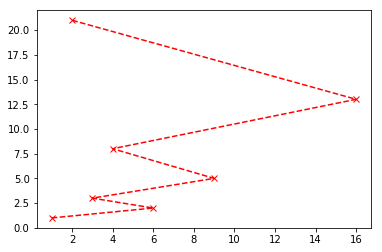

In [9]:
plt.plot(x, y, 'rx--');

You might be thinking that, while the `fmt` argument is pretty powerful, it's also quite terse, and seems pretty hard to learn and remember. Fortunately, you don't *have* to control style with `fmt`; it just provides a convenient shorthand notation. If you prefer to be explicit, you can independently control each of the options that `fmt` allows you to manipulate:

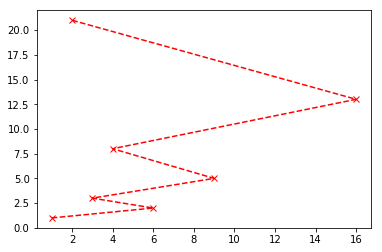

In [10]:
plt.plot(x, y, color='red', marker='x', linestyle='dashed')

The above command produces exactly the same result as the previous one, but is much more explicit.

At this point you might be wondering how many other parameters the `plot()` function accepts. The answer is "a lot". Here's another example illustrating just some of the parameters at your disposal. We'll also take the opportunity to replace our collection of random data points with something a little more orderly.

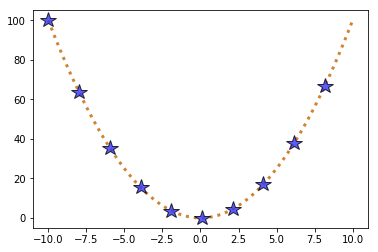

In [11]:
import numpy as np

# y = x^2 in the range of -10 to 10
x = np.linspace(-10, 10, 100)
y = x**2

plt.plot(x, y, color='#c26603', marker='*', markersize=16, markeredgecolor='black',
         markerfacecolor='#3333fc', linewidth=3, linestyle=':', alpha=0.8, markevery=10);

What do all the parameters in the above call do? Most of them are self-explanatory (e.g., `markeredgecolor` controls the color of the marker borders), but it might not be obvious that `alpha` controls the opacity level of the plotted objects, and `markevery` indicates that we only want to plot a marker for every $n^{th}$ data point we pass in. Observe that, in this example, we replaced our earlier list of values with 100 points sampled from the function $y = x^2$ in the range of [-10, 10]. If we hadn't used `markevery`, we would have ended up with a very busy and very ugly plot.

There are plenty of other parameters you can pass to `plot()`, and many of them show up throughout the matplotlib API (for example `scatter()` accepts many, though not all, of the same parameters). So it's worth perusing the matplotlib [documentation](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) to get a feel for what's possible.

### High-level plots in matplotlib
Matplotlib is a very rich package. One of its notable features is that it provides plotting interfaces at both high and low levels. At the high level, matplotlib's pyplot module includes [a large number of functions](https://matplotlib.org/api/pyplot_summary.html) that can construct common types of plots in a single call. We've already seen the `plot()` and `scatter()` functions, which by default produce line plots and scatter plots, respectively. But matplotlib also has things like `bar()`, `contour()`, `hist()`, and `hlines()`, which respectively produce bar plots, contour plots, histograms, and horizontal lines. It also has support for less common plots--some of which are widely used in specific domains of analysis--like `barbs()`, `hexbin()`, `magnitude_spectrum()`, and so on. For example:

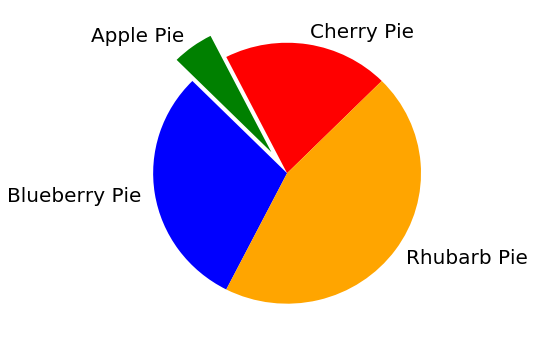

In [12]:
# Set the figure to a fixed size (6 x 6 inches)
plt.figure(figsize=(6, 6))

# Yes, it's a pie chart.
plt.pie([4, 1, 6, 9], explode=[0, 0.2, 0, 0], labels=["Cherry Pie", "Apple Pie", "Blueberry Pie", "Rhubarb Pie"],
        colors=["red", "green", "blue", "orange"], startangle=45, textprops={'fontsize': 20});

And just like that, in a single line of code, we have an elegant-looking pie chart. I mean, sure, it's still a pie chart. But as pie charts go, it's quite lovely.

### The obect-oriented matplotlib API
While matplotlib's high-level pyplot API can be useful for generating relatively simple plots, as we'll see later, there are other tools that arguably do a better job generating aesthetically pleasing off-the-shelf plots. Where the power of matplotlib really shines through is in its low-level, object-oriented API, which allows a power user to control almost every element of the plot in an object-oriented, reusable, modular manner. Fair warning though: the object-oriented API has a pretty steep learning curve, and is often fairly unintuitive. We're not going to get into any real amount of detail in this overview; but to illustrate just how much control matplotlib's object-oriented API gives you, we'll create a nice-looking plot with some heavily customized features--including hollow markers, a grid with both major and minor ticks, a legend, and custom axis limits. And this only scratches the surface of what's possible. If you want to get a better sense of what you can achieve with matplotlib, take a look at the example [gallery](https://matplotlib.org/gallery/index.html).

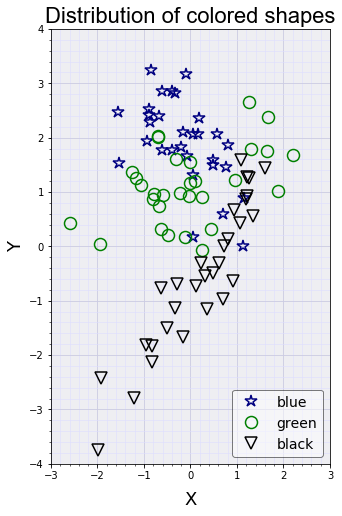

In [13]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
from matplotlib.lines import Line2D 
from IPython.core.display import display

# Create a new figure
fig = Figure(figsize=(5, 8))

# Attach a canvas to the figure
FigureCanvas(fig)

# Add a subplot (i.e., an Axes object)
ax = fig.add_subplot(1, 1, 1)

# Create some lines and add them to the plot.
# We could do this more easily with pyplot's .plot(),
# but this is an exercise in masochism.

# intercepts and slopes for the three data series
lines = [(2, -0.8), (1, 0.3), (-1, 1.2)]

# Other visual parameters that vary by line
colors = ['navy', 'g', 'k']
markers = ['*', 'o', 'v']
labels = ['blue', 'green', 'black']

# Loop over data series, construct Line2D for each one,
# and add it to the subplot
for i in range(3):
    intercept, slope = lines[i]
    # Create some data
    x = np.random.normal(size=30)
    y = x * slope + np.random.normal(intercept, 0.6, size=30)
    # Make the line
    line = Line2D(x, y, marker=markers[i], linestyle='', color=colors[i],
                  markersize=12, fillstyle='none', markeredgewidth=1.5,
                  label=labels[i])
    # Add line to plot
    ax.add_line(line)
    
# Set a gray background
ax.set_facecolor('#eeeef2')

# Set up grid lines
ax.grid(which='both')
major_ticks = np.arange(-10, 10, 1)
minor_ticks = np.arange(-10, 10, 0.2)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which='minor', alpha=0.7, color='#ddddff')
ax.grid(which='major', alpha=0.9)

# Pick sane x and y-axis limits
ax.set(xlim=(-3, 3), ylim=(-4, 4))

# title and axis labels
ax.set_title('Distribution of colored shapes', fontsize=22,
             fontname='Arial')
ax.set_xlabel('X', fontsize=18, labelpad=10)
ax.set_ylabel('Y', fontsize=18)

# Add legend in lower right with semi-transparent frame
ax.legend(loc='lower right', fontsize=14, framealpha=0.5, edgecolor='k')

# Show the plot in the notebook
display(fig)

### Meeting in the middle
At this point you may find yourself thinking that while matplotlib clearly has a lot going for it in terms of available functionality, neither of its APIs is quite optimal: the high-level API generates simple but fairly crude, and often ugly, plots, whereas the low-level API is extremely powerful but far too verbose to justify using for routine visualization work. Fortunately, the two interfaces interact with one another seamlessly. In fact, the high-level API is built directly on the low-level API. Meaning, when you call a function like `scatter()`, what matplotlib constructs for you is actually all the stuff you saw explicitly in the object-oriented example (an `Axes` subplot, one or more `Line2D` objects, etc.). The upshot is that we can combine the two APIs by first calling one of the high-level plotting functions to generate the basic plot we want, and then tweaking the result extensively via the low-level API. In practice, this is the most common way people work with matplotlib.

Let's illustrate this hybrid approach by revisiting an earlier example. We'll re-plot our rather bizarre quadratic-function-with-blue-stars--but this time, we'll carefully customize it to make it even more bizarre.

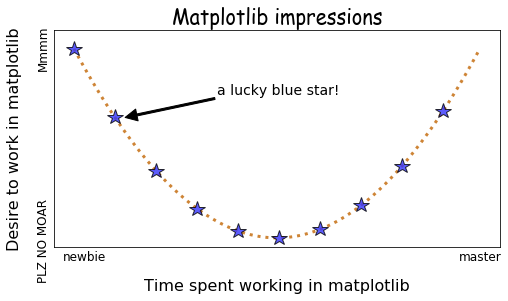

In [14]:
x = np.linspace(-10, 10, 100)
y = x**2

# Basic plot...
plt.plot(x, y, color='#c26603', marker='*', markersize=16, markeredgecolor='black',
         markerfacecolor='#3333fc', linewidth=3, linestyle=':', alpha=0.8, markevery=10)

### Customize the plot ###

# Change the aspect
plt.gcf().set_size_inches((8, 4))

# # Set title and axis labels
plt.title("Matplotlib impressions", fontsize=20, fontname="Comic Sans MS")
plt.xlabel("Time spent working in matplotlib", fontsize=16, labelpad=15)
plt.ylabel("Desire to work in matplotlib", fontsize=16, labelpad=15)

# # # Replace tick labels with something more... descriptive
plt.xticks([-9.5, 10], ['newbie', 'master'], fontsize=12)
plt.yticks([18, 110], ['PLZ NO MOAR', 'Mmmm'], rotation=90, ha='right', fontsize=12)

# # # Hide ticks
plt.gca().tick_params(axis=u'both', which=u'both',length=0)

# # # Annotate the second star
plt.annotate("a lucky blue star!", (x[10] + 0.5, y[10]), xytext=(x[20] + 3, y[20] + 40),
             arrowprops=dict(facecolor='black', width=2), fontsize=14);

While the outcome in this case is nothing to write home about (unless your letter home begins with "you won't believe what they're teaching me here..."), the example should hopefully make it clear that matplotlib allows you to customize virtually every aspect of your plot. You just have to be willing to spend a lot of time reading the object-oriented API and/or trawling through dozens of frustrated Stack Overflow posts.

## Composing multi-plot figures
So far we've only dealt with figures that have a single plot. But it's very common to want to construct more complex figures made up of multiple panels--often in irregular arrangements (e.g., a single left column, and a right column broken up into 3 separate cells). Matplotlib provides a variety of tools for working with multi-plot layouts. Here we'll illustrate a couple of the more accessible ones. In general, we can think of a `Figure` in matplotlib as a container for one or more `Axes` objects, where the position of the `Axes` in relation to the `Figure` is specified when the former is attached to the latter.

Let's first consider the case where we're working with a regular layout--meaning, we want to divide our figure into a fixed number of rows and/or columns. Say we want to generate the same basic plot for multiple discrete groups or bins of data. The easiest way to deal with this kind of situation in matplotlib is using the `subplots()` function. We'll take a look at `subplots()` in a moment; but before we do that, let's start looking at some real data, instead of working with random numbers. We'll use the `load_dataset` utility in a plotting library called `seaborn` to import the famous "iris" dataset:

In [15]:
# We're not going to talk about seaborn just yet;
# we're just using its data loading utility to retrieve
# the iris dataset.
import seaborn as sns
iris = sns.load_dataset('iris')

Here's what the Iris dataset looks like:

In [16]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Now let's look at how we can go about composing a figure made up of many different subplots in matplotlib. We'll capitalize on the fact that the Iris dataset contains observations for 4 different attributes measured in 3 different Iris species to generate a 4 x 3 plot, where each cell shows a histogram of observations.

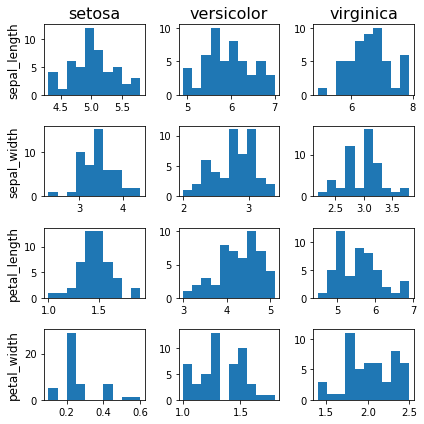

In [17]:
# Set up the figure and axes--a 4 x 3 grid.
# We share both the x and y axes so it's easy to compare values.
fig, axes = plt.subplots(4, 3, figsize=(6, 6))

# We'll plot each species of iris in a different column
species = ['setosa', 'versicolor', 'virginica']

# ..and a histogram of each attribute in a separate row
attrs = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for i in range(3):
    sp = species[i]
    sp_data = iris.query('species == @sp')
    # Show column names
    axes[0, i].set_title(sp, fontsize="16")
    for j in range(4):
        attr = attrs[j]
        values = sp_data[attr]
        # plot separately on each Axes
        axes[j, i].hist(values)
        
        # Only plot y-axis label for first column
        if i == 0:
            axes[j, i].set_ylabel(attr, fontsize=12)

# A fairly magical layout manager that tends to clean up
# figures well and prevent overlap between elements.
plt.tight_layout()

Notice that, in the above example, most of the code is concerned with manipulating the data and tweaking the plot aesthetics. The code to set up the multi-panel layout is relatively trivial: it takes one line to set up an array of `Axes` objects (using the `subplots()` function, which we politely ask for `4` rows and `3` columns), and after that, we simply loop over elements of the `axes` list and call our plotting functions directly on each `Axes` object.

#### More complex layouts
What happens when we want a more complex layout--i.e., one that doesn't have evenly-spaced columns and/or rows? There are [several different ways](https://matplotlib.org/users/gridspec.html) we could construct our layout; we'll take a look at one method for generating an arbitrary complex grid layout, using matplotlib's `GridSpec` utility. `GridSpec` works by layout out a grid of arbitrary resolution across the full canvas; then, we can create new subplots by indexing into that grid just like a normal numpy array.

For this example, we'll create a 20 x 20 grid (which isn't actually visible in the figure). We'll use most of the figure to show a photograph of an Iris setosa in a large subplot at top left; this will also give us a chance to see how matplotlib handles image plotting. Then we'll create square subplots to the right and bottom of the main subplot and use those for histograms and scatter plots.

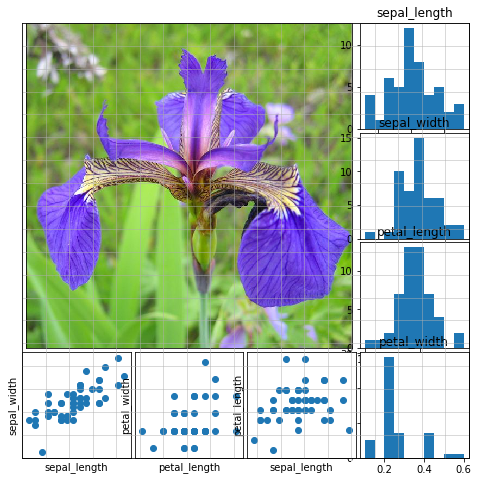

In [18]:
import matplotlib.gridspec as gridspec

data = iris.query('species == "setosa"')

# Set up figure dimensions
fig = plt.figure(figsize=(8, 8))

# Create a 20 x 20 grid
gs = gridspec.GridSpec(20, 20)

# Now we can carve out a subplot from any part of the grid.
# Let's start by taking up the top left 12 x 12 cells.
big_ax = plt.subplot(gs[0:15, 0:15])

# We'll show a photograph of a setosa iris.
import matplotlib.image as mpimg
img = mpimg.imread('images/setosa.jpg')
big_ax.imshow(img)

# Hide ticks
big_ax.set_xticks([])
big_ax.set_yticks([])

# Add histograms on the right
attrs = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for i in range(4):
    start_ind = i * 5
    attr = attrs[i]
    hist_ax = plt.subplot(gs[start_ind:(start_ind + 5), 15:])
    hist_ax.hist(data[attr])
    hist_ax.set_title(attr, fontsize=12)
    
# And show bivariate scatterplots below
pairs = [
            ('sepal_length', 'sepal_width'),
            ('petal_length', 'petal_width'),
            ('sepal_length', 'petal_length')
        ]
for i in range(3):
    xvar, yvar = pairs[i]
    start_ind = i * 5
    scatter_ax = plt.subplot(gs[15:, start_ind:(start_ind + 5)])
    scatter_ax.scatter(data[xvar], data[yvar])
    scatter_ax.set_xlabel(xvar)
    scatter_ax.set_ylabel(yvar)
    scatter_ax.set_xticks([])
    scatter_ax.set_yticks([])
    
# Show grid lines corresponding to the underlying GridSpec,
# just to facilitate understanding.
grid_ax = fig.add_subplot(111)
ticks = np.arange(0, 20, 1)
grid_ax.set_xticks(ticks)
grid_ax.set_yticks(ticks)
grid_ax.set_xticklabels([])
grid_ax.set_yticklabels([])
grid_ax.tick_params(color='white')
grid_ax.grid(True, alpha=0.6)
grid_ax.patch.set_alpha(0.)

The result above is pretty ugly (though we could make it much prettier with some more fiddling!), but it illustrates how one can layout arbitrarily complex layouts in matplotlib. As before, most of the code is preoccupied with plotting the contents of each subplot, rather than with generating the layout.

Note that we're deliberately overlaying a 20 x 20 set of gridlines on the figure above in order to make it clearer how the `GridSpec` object is constructed, and how we generate subplots by indexing into the grid. For example, we created the big top left panel by asking for a subplot take takes up the first 15 cells along both the x and y axes. Each of the smaller subplots then take up a 5 x 5 chunk of the grid along one of the margins. In practice, you probably wouldn't want to add this additional layer to your figure.

## Beyond base matplotlib
Matplotlib is a very powerful library, and remains the dominant visualization package in Python. Its strengths include near-limitless customizability and control, a comprehensive object-oriented API, close integration with the numpy library for numerical computing, and extremely active developer and user communities.

That said, matplotlib also has some significant weaknesses: its learning curve is steep; the object-oriented API is often unpredictable, inconsistent, or redundant; the default style is arguably somewhat ugly; and the documentation remains a bit confusing (though it's improved considerably in recent years). Perhaps most importantly, some seemingly simple plot adjustments can require a surprisingly large amount of code, so that in practice, generating relatively common types of plots in matplotlib is often somewhat inefficient.

Fortunately, matplotlib's modular, object-oriented API has enabled many developers to build higher-level visualization packages that sit directly on top of matplotlib, but abstract away many of matplotlib's annoying details. Let's briefly review a number of Python plotting libraries that rely internally on matplotlib, but often present users with a much more pleasant experience.

### pandas
Pandas is the de facto package for data manipulation in Python. Recent versions of pandas have introduced a fairly broad set of plotting tools that make it easy to generate a wide range of matplotlib plots from within pandas itself--typically by calling plotting methods on pandas `DataFrame` objects. In fact, pandas' plotting functionality is a bit reminiscent of matplotlib's pyplot module in that much of the plotting functionality can be accessed through a single `.plot()` method implemented in the `DataFrame` class.

Let's take advantage of the Iris dataset we've already loaded--which, conveniently, is already represented as a pandas `DataFrame`. What happens if we call `.plot()` on our `iris` object?

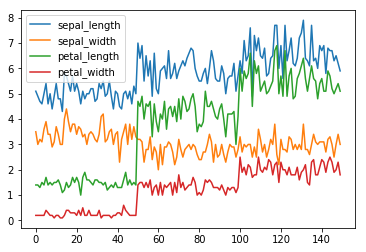

In [19]:
# KDE plot of all iris attributes, collapsing over species
iris.plot();

Much like pyplot, if we don't give the `plot()` method any further arguments, it assumes that we want to generate line plots. Notice that because our dataset contains 4 numerical columns (`'sepal_length'`, `'sepal_width'`, etc.), `plot()` automatically adds a new line for each column.

In this case, because each row of the dataset is a different observation (i.e., a single Iris flower), a line plot is not a meaningful way to represent the data. A more sensible thing to do might be to plot a smoothed histogram of each variable. We can take advantage of the `kind` argument, which allows us to construct a range of common plots:

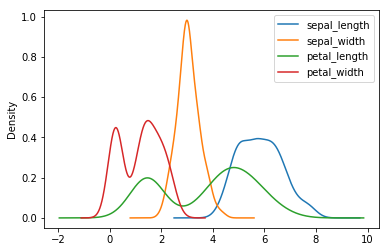

In [20]:
iris.plot(kind='kde');

This plot is still not terribly compelling. For one thing, we're implicitly collapsing over three different species of Iris that may have largely separable distributions. For another, it probably doesn't make sense to plot all four attributes on the same scale, seeing as they measure qualitatively different things (even if they're all nominally measured in centimeters).

To address this, we can take advantage of some of pandas other plotting tools. For example, in addition to the convenient `plot()` method, every pandas `DataFrame` exposes a number of other plotting methods that offer more flexibility. In this case, we'll use the `boxplot()` method, which wraps pyplot's own function of the same name (enabling us to pass any arguments that the pyplot version recognizes).

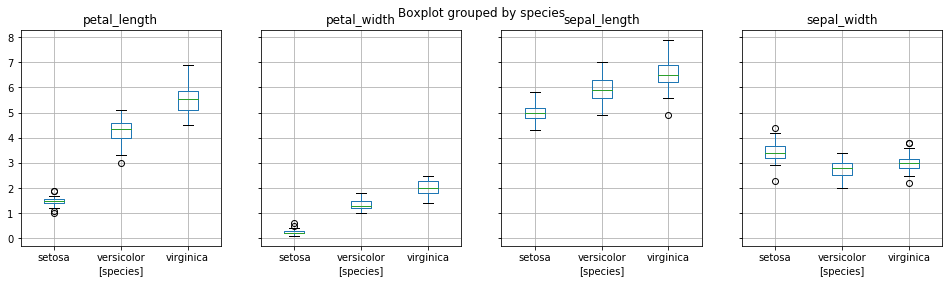

In [21]:
# Separate boxplot of iris attributes for each species
iris.boxplot(by='species', figsize=(16, 4), layout=(1, 4));

The resulting figure is clean enough, and lets us construct useful data displays very quickly. It's probably not the most aesthetically appealing plot we've ever seen, but remember: plotting functionality in pandas is built on top of matplotlib. This means that most pandas plots will return references to matplotlib objects when called, enabling us to use matplotlib to tweak the figure to our heart's content once we've generated the basic layout. For example, we can clean up and beautify our boxplot like so:

/Users/tal/miniconda3/envs/base/lib/python3.6/site-packages/pandas/plotting/_core.py:2257: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


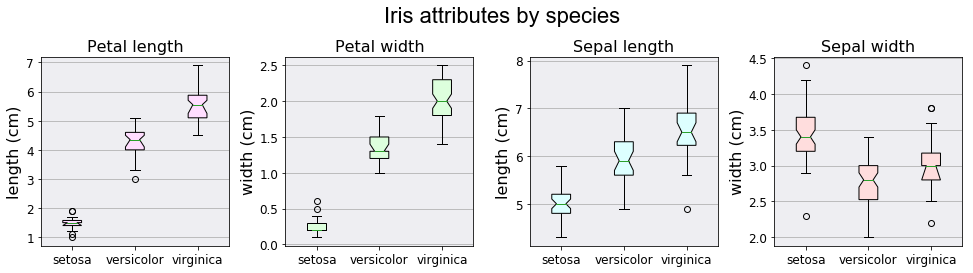

In [22]:
# Set up axes ahead of time so we can customize them. The only benefit
# in this case is we get to set sharey=False, which pandas sets to
# True otherwise.
fig, axes = plt.subplots(1, 4, figsize=(16, 3.5), sharey=False)

# Separate boxplot of iris attributes for each species.
# Note the return_type argument; in this case, we're indicating
# that we want to get back both the Axes objects matplotlib creates,
# and the dictionaries created by pyplot's boxplot() function.
subplots = iris.boxplot(by='species', ax=axes, return_type='both', notch=True,
                        bootstrap=10000, patch_artist=True, fontsize=12);

varnames = ['Petal length', 'Petal width', 'Sepal length', 'Sepal width']
ylabels = ["length (cm)", "width (cm)", "length (cm)", "width (cm)"]
colors = ['#ffddff', '#ddffdd', '#ddffff', '#ffdddd']

# Stuff we need to do separately for each subplot
for i, sp in enumerate(subplots):
    # We asked for both the Axes and the boxplot's dict
    ax, box = sp
    # Embiggen title
    ax.set_title(varnames[i], fontsize=16)
    # Only show gridlines along y
    ax.grid(axis='x')
    # y-axis label
    ax.set_ylabel(ylabels[i], fontsize=16)
    # background
    ax.set_facecolor('#eeeef2')
    # Hide xlabel
    ax.set_xlabel('')
    
    # Set all boxes in the current subplot to the same color
    for patch in box['boxes']:
        patch.set(facecolor=colors[i], edgecolor='k', linewidth=1)
    for whisk in box['whiskers']:
        whisk.set(color='k')

# Change figure-level options
fig = plt.gcf()
fig.suptitle('Iris attributes by species', size=22, y=1.1, fontname='Arial')

# Fix spacing issues
plt.subplots_adjust(wspace=0.3)

### Seaborn
The plotting tools in pandas are very useful for rapid data exploration. But as we saw above, the plotting functionality in pandas is mostly focused on creating a tight, easy-to-use coupling between pandas data structures like the `DataFrame` and common pyplot plots. If we want to create more complex plots, or mess with the aesthetics of our plots, we usually still end up doing a bunch of work in base matplotlib.

Fortunately, there's another Python package called `seaborn` that also leverages matplotlib and pandas structures, but provides an even higher-level plotting interface, and produces plots that usually look beautiful with almost no tweaking required. Seaborn also has exceptional [documentation](https://seaborn.pydata.org/index.html), including an excellent set of [tutorials](https://seaborn.pydata.org/tutorial.html).

Let's try to generate something very similar to the boxplot we made above, but using seaborn rather than pandas. Our first, naive attempt, might be to simply pass the `iris` dataset to seaborn's `boxplot()` function:

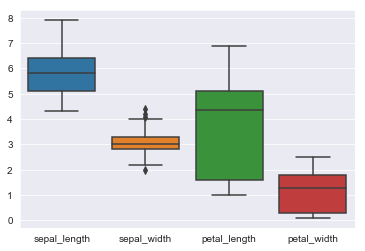

In [23]:
# Set to one of seaborn's built-in plotting styles
sns.set_style('darkgrid')

# Plot a boxplot for the iris dataset with all default parameters 
sns.boxplot(data=iris)

This plot certainly looks nicer than what pyplot or pandas give us out of the box, and seaborn's `boxplot` it's smart enough to figure out that we probably want to plot each variable in the `DataFrame` separately. But we still have the same problem we had earlier, in that we're collapsing over species that probably look quite different.

How would we go about splitting the plot into 4 subplots, like we did before? We have several options. One is to use matplotlib to set up the figure ourselves, and then call seaborn separately within each `Axes`:

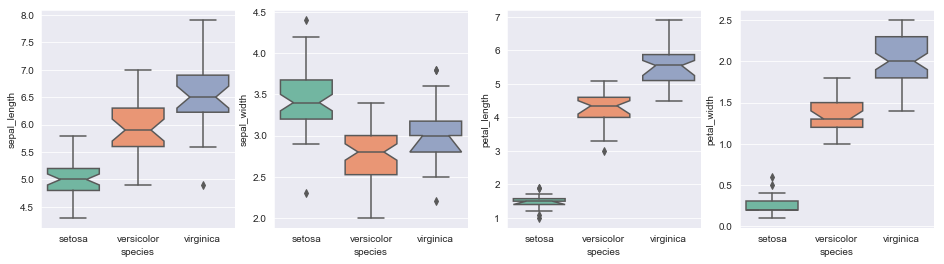

In [24]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4), sharey=False)

# Explicitly list the variables to map onto subplots
variables = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# For each of the variables, use a different subplot
for i, var in enumerate(variables):
    species_data = iris[[var, 'species']]
    sns.boxplot(x='species', y=var, data=species_data, ax=axes[i], palette='Set2',
                notch=True, bootstrap=10000)

The above gives us a nice-looking set of boxplots, in significantly less code than it took us to generate the pandas example (though, to be fair, we didn't *have* to do all that aesthetic tweaking in the pandas version). Moreover, seaborn's focus on producing aesthetically appealing plots means that most seaborn plotting functions expose a large number of arguments that control the appearance of the figure in a fairly high-level way.

That said, in the above example, we're still left having to set up the figure layout ourselves in matplotlib, which is kind of annoying, and arguably defeats the point of working with a high-level interface. Is there a way we can get seaborn to understand that we want a separate subplot for each of our variables? Fortunately, there is! Seaborn has good support for multi-plot grids. While you can't get nearly as fancy as you can using base matplotlib, for common use cases, there are often easy ways to set up a figure the way we want it.

Let's see how we can do this for the Iris dataset, using seaborn's `FacetGrid` class. The general idea behind the `FacetGrid` is that we create the grid layout first, passing in the dataset we want to attach. After that, we can call the `FacetGrid`'s `.map` method to apply the plotting function (plus any passed arguments) to each cell in the grid.

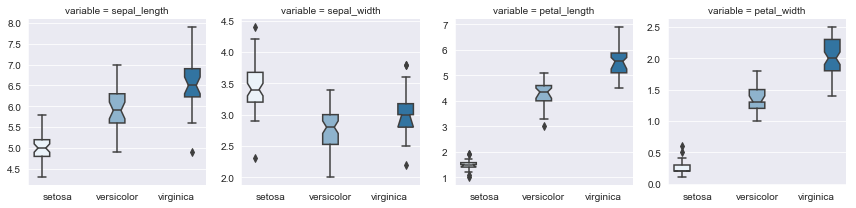

In [25]:
# seaborn expects data in tidy, long format, so we need
# to first "melt" our dataset so that each row is a single
# observation/variable combination.
iris_melted = iris.melt('species')

# Create the FacetGrid, indicating that we want a separate
# column for each variable.
g = sns.FacetGrid(iris_melted, col='variable', sharey=False, )

# Apply the boxplot plotting function to each cell of the FacetGrid.
# Here, the first argument gives the plotting function, and subsequent
# arguments are passed through to the plotting function. I.e., 
g.map_dataframe(sns.boxplot, x='species', y='value', hue='species', notch=True, bootstrap=10000);

And just like that, we have an elegant-looking plot that captures the same information as before, but in just two lines of code. Of course, this example only scratches the surface of what seaborn can do. The package includes plenty of other high-level plotting functions that enable us to generate very elegant, complex plots in very little code. But since the example [gallery](https://seaborn.pydata.org/examples/index.html) includes plenty of well-documented examples that you can easily experiment with, there's no need to belabor the point here.

### ggplot2 in Python (kind of)
The plotting tools we've covered so far are all native Python packages born and raised within the Python/matplotlib ecosystem. But there are also a number of Python visualization packages that reflect efforts to port popular packages developed in other languages. The most prominent example is the [ggplot2](https://ggplot2.tidyverse.org/) library for R, which has (justifiably) attracted something of a cult following within the R community. ggplot2 differs from most other plotting libraries in that it heavily emphasizes a "[grammar of graphics](https://cfss.uchicago.edu/dataviz_grammar_of_graphics.html)" approach to visualization. The core idea is to reimagine visualization as a kind of generative language, where one can combine simple ideas (or layers) into more complex ones by following a set of relatively simple rules.

An introduction to the ggplot2 syntax is beyond the scope of this review of Python tools; we're covering it here mostly for the benefit of people who are already familiar with ggplot2, and are wondering if Python has any similar package. The answer is that Python not only has a *similar* package, it actually has a near-complete port of ggplot2, in the form of the [plotnine](https://github.com/has2k1/plotnine) package (though there are other more limited and/or buggier ports too). Plotnine can do just about everything ggplot2 can do, with some unavoidable minor modifications to the syntax to account for differences between the R and Python languages (e.g., most variable names need to be passed as strings).

For example, here's how we'd achieve something functionally very similar to the boxplots we already saw earlier in plotnine:

/Users/tal/miniconda3/envs/base/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
/Users/tal/miniconda3/envs/base/lib/python3.6/site-packages/pandas/core/generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Users/tal/miniconda3/envs/base/lib/python3.6/site-packages/pandas/core/generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
/Users/tal/miniconda3/envs/base/lib/python3.6/site-packages/plotnine/positions/position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


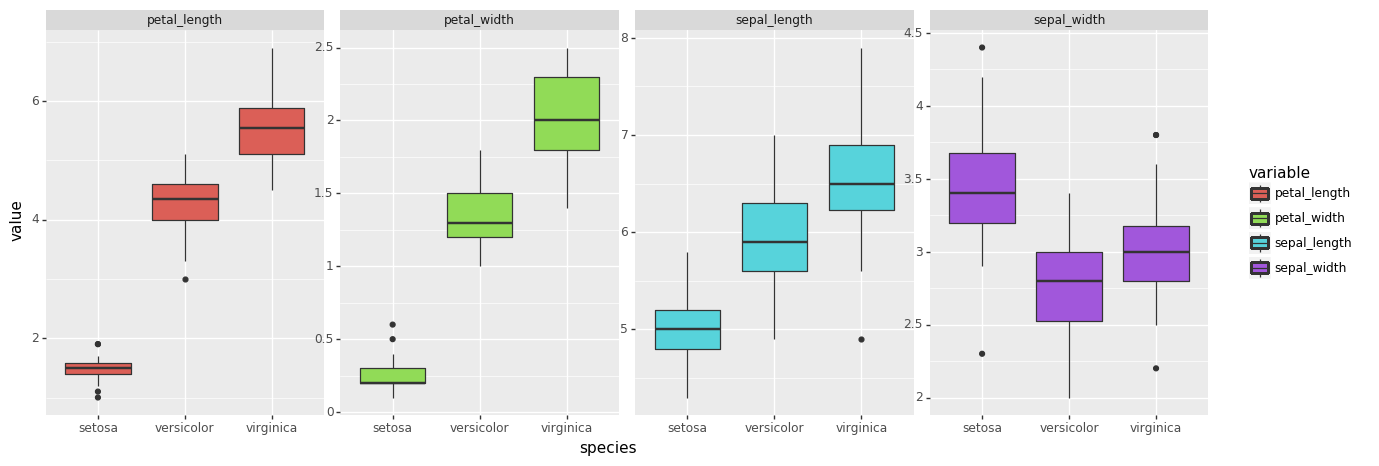

In [41]:
# Import everything we need from plotnine--note all the components
# that should be familiar to experienced ggplot2 users.
from plotnine import ggplot, aes, geom_boxplot, facet_wrap

# Create the plot we want--virtually the same as in ggplot2, but note
# that variable names need to be passed as strings.
p = (ggplot(iris_melted,
     aes(x='species', y='value', fill='variable'))
     + geom_boxplot()
     + facet_wrap('~variable', 1, 4, scales='free_y', ))

# The plotnine model is a bit different from most packages built
# on matplotlib; if we want to return matplotlib handles,
# we need to call draw() explicitly to get the MPL figure back.
fig = p.draw()

# Now we can adust size (or anything else) the usual way
fig.set_size_inches((15, 5))

### Domain-specific packages
Aside from the major packages we've covered here (plus some others we haven't talked about--e.g., HoloViews, Altair, Bokeh, etc.), there are a very large number of other Python packages that cater to specific domains of analysis and include at least some plotting functionality. At present, nearly all of these tools use matplotlib as their backend. This means that, whether you're creating visualizations specific to astrophysics, ecology, or neuroimaging, there's a good chance that the libraries you'll be working with return matplotlib `Axes` objects that you can use to further customize your figures.

To illustrate, let's look one particular domain-specific application: creating a montage of brain slices using the `nilearn` package. Nilearn is a library for neuroimaging data analysis and visualization; it builds heavily on the scikit-learn machine learning library. Many neuroimaging researchers use nilearn's `plotting` module to generate quick, elegant-looking plots. Because `nilearn.plotting` uses matplotlib to render figures, we have the standard matplotlib arsenal at our disposal when we want to modify the base plots created by nilearn.

For example, the code below shows how we can easily create a montage of axial brain slices in nilearn. (If you don't care about brain imaging and/or don't know what an "axial slice" is, don't worry--the details aren't important; the point to note is simply that even domain-specific plotting tools in Python are probably using matplotlib).

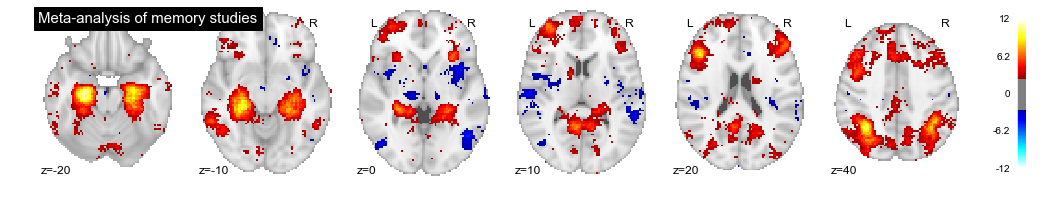

In [40]:
# Import the plotting function we'll use
from nilearn.plotting import plot_stat_map

# We'll use a random brain image bundled with this notebook.
# It shows brain regions associated with memory, and 
# comes from an automated meta-analysis of over 2,000 fMRI studies.
# You can find an interactive version of the map at:
# http://preview.neurosynth.org/analyses/terms/memory/
img = 'images/memory_association-test_z.nii.gz'

# Plot 6 axial slices, thresholding at p < .01 (i.e., z=2.58).
plot_stat_map(img, cut_coords=[-20, -10, 0, 10, 20, 40], display_mode='z',
              threshold=2.58, title="Meta-analysis of memory studies");

Though it's not obvious from our code or the resulting image, the figure above is internally generated using matplotlib. Consequently, we can manipulate it just like any other matplotlib object--or combine it with most other visualization tools based on matplotlib.

To illustrate, let's compose a more elaborate figure that shows slices for two different brain images, and then, in a third panel, displays a [hexbin plot](http://datavizproject.com/data-type/hexagonal-binning/) showing the joint distribution of all [voxel](https://en.wikipedia.org/wiki/Voxel) values. We'll begin by laying out a grid using the `GridSpec` utility we saw earlier; then we'll proceed by alternatively calling nilearn for the slice plotting and pyplot for the hexbin plotting.

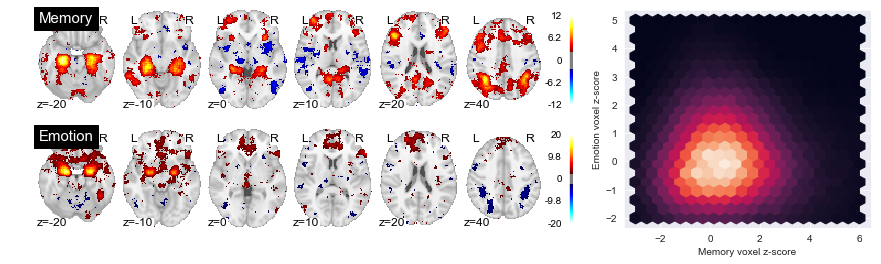

In [28]:
from matplotlib.gridspec import GridSpec
import nibabel as nb

# # Set up the figure: 2 columns, with 1st broken into two rows
fig = plt.figure(figsize=(15, 4))

# Create the GridSpec: 2 rows, 3 columns.
gs = GridSpec(2, 3)

# Plot first image's axial slices in top row
ax_img1 = plt.subplot(gs[0, :2])

# Load the first image
img1 = nb.load('images/memory_association-test_z.nii.gz')

# Call nilearn for the plotting.  Note that we pass the subplot
# we just created to the function in the `axes` argument.
plot_stat_map(img1, cut_coords=[-20, -10, 0, 10, 20, 40], display_mode='z', threshold=2.33,
              title="Memory", axes=ax_img1);

# Same as for image 1, but we plot in the bottom row.
ax_img2 = plt.subplot(gs[1, :2])
img2 = nb.load('images/emotion_association-test_z.nii.gz')
plot_stat_map(img2, cut_coords=[-20, -10, 0, 10, 20, 40], display_mode='z', threshold=2.33,
              title="Emotion", axes=ax_img2);

# Use the right third of the figure for the hexbin subplot.
ax_joint = plt.subplot(gs[:, 2:])

# Get the voxel data for both images
x = img1.get_data().ravel()
y = img2.get_data().ravel()

# Only plot  voxels with a non-zero value in at least one map
valid = np.logical_or(x != 0, y != 0)

# A hexbin plot showing the joint distribution of voxel values
# in the two maps. This isn't really the best way to represent this
# information, but this is purely for illustration purposes, and
## the result here is so beautiful I can't help but show it.
ax_joint.hexbin(x[valid], y[valid], gridsize=20, extent=(-3, 6, -2, 5));
ax_joint.set(xlabel='Memory voxel z-score', ylabel='Emotion voxel z-score');

### Interactive visualization in the Jupyter notebook
Matplotlib isn't restricted to generating static figures. It can also be used in other ways. For example, one common application we won't cover here is animation. Matplotlib includes an [animation](https://matplotlib.org/api/animation_api.html) module that can be used to greatly simplify the generation animations. The core idea is that we write a function that generates the plot you want, but takes time as a parameter; then, we iterate over the time dimension and generate a series of frames that can be concatenated into an animation (which can then be exported as a video or animated gif).

A different and probably more common use case for dynamic plotting is interactive visualization. Often, we want to explore a visualization by moving around within a graph, zooming in our out, investigating what happens if we change a particular parameter, and so on. There are a variety of tools that support interactive visualization in Python. Many of these consist of extensions to the Jupyter Notebook. Since we're already working inside a Jupyter Notebook, we'll demonstrate a few of these tools. Note that, if you're viewing a static version of this notebook rendered on the web, you won't be able to see the interactive components. For that, you'll have to run the notebook locally, or fire it up on [binder](https://mybinder.org/).

The first thing to be aware of is that obtaining a basic level of interactivity for *all* matplotlib figures generated inside a notebook is trivial; all we have to do is run the following line in our notebook:

In [36]:
# Note: if working in JupyterLab, replace with %matplotlib widget
# You may have to wrestle with dependencies to get this to work.
%matplotlib notebook

That's it! That simple instructions tells matplotlib to use the `notebook` backend, which adds widgets for panning within images. Nothing too fancy, but then, we barely had to do anything to gain that extra functionality. (Note that if you want to turn the interactive features off, you can run `%matplotlib inline` to just plot static images inline again.)

#### Ipython widgets
Now let's look at something a bit more complicated, but also more useful. Suppose we have a simple plot--say a simple sine wave like this:

<IPython.core.display.Javascript object>


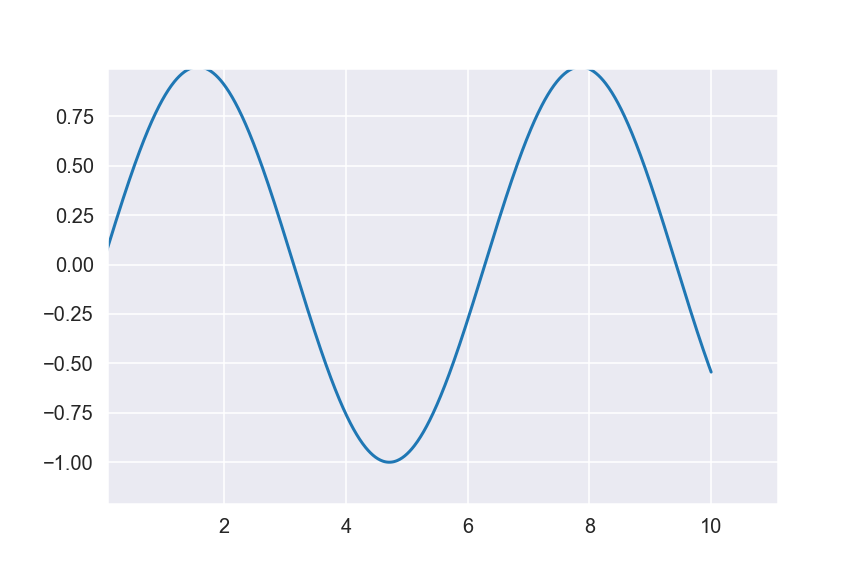

In [37]:
x = np.linspace(0, 10, 1000)
y = np.sin(x)
plt.plot(x, y);

Often in visualization, we're interested in understanding how a visualization changes as a function of one or more parameters. It can be a great help in such cases to *interactively* manipulate those parameters. For example, in the above case, we might want to see what happens to our sine wave as we systematically vary the frequency. If we're working in a Jupyter notebook, we can take advantage of Jupyter's [interact widget](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html) to bind our plotting function to an interactive slider. To do this, we need to wrap our plotting code in its own function:

In [38]:
def f(freq=1):
    x = np.linspace(0, 10, 1000)
    y = np.sin(x * freq)
    plt.plot(x, y);

Now all we need to do is bind the `freq` argument in our function `f()` to a slider in the Jupyter notebook. The `interact` function makes this trivial:

In [39]:
# Revert to ordinary inline plotting;
# notebook mode will interfere.
%matplotlib inline

from ipywidgets import interact

interact(f, freq=(-10, 10));

interactive(children=(IntSlider(value=1, description='freq', max=10, min=-10), Output()), _dom_classes=('widge…

And just like that, we have an interactive plot that lets us see how our sine wave changes as we change its relative frequency by adjusting the slider. Internally, all that's happening is that every time we move the slider, the Jupyter notebook makes a call to our plotting function `f`, passing the current value of `freq`. While this example is pretty trivial, you could potentially construct much more sophisticated dashboards inside Jupyter using a similar approach (though there are other tools like [plotly](https://plot.ly/python/ipython-notebook-tutorial/) and [Bokeh](https://bokeh.pydata.org/en/latest/docs/user_guide/notebook.html) that are arguably better-suited to such applications).

## Alternatives to matplotlib
All of the Python visualization tools we've covered in this overview use matplotlib as their rendering back-end. But I don't want to leave you with the impression that matplotlib is the only game in town when it comes to visualization in Python. There are an increasing number of other tools that don't depend on matplotlib at all, or can use it optionally. Most of these address use cases that matplotlib is historically not well-suited for--for example, browser-based interactive visualizations using [Plotly](https://plot.ly) or [Bokeh](https://bokeh.pydata.org/)), or declarative construction of cross-platform [Vega-Lite](https://vega.github.io/vega-lite/) specifications using [Altair](https://altair-viz.github.io/). I won't cover these tools here, but they're well worth taking the time to explore, and the declarative approach to visualization, in particular, arguably represents the biggest growth area in visualization at the moment.